## _Clustering_
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups

1. Partitioning based methods
> K-means clustering
2. Hierarchical based methods
> Agglomerative clustering (bottom-up-approach)

## _K-means Clustering algo_

Step 1: _INITIALIZE_
   - Randomly select 'k' data objects from the dataset, each of which represents a cluster center
<br>

Step 2: _ITERATE_
  - (repeat) For each of the remaining data items an item is assigned to a cluster to which it is most similar/closest (minimum distance)
  - It then computes a new mean for each cluster and update centroids
<br>

Step 3: _TERMINATE_
   - Terminate when current cluster mean equals last clusters mean

In [141]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sn
import matplotlib as plt
%matplotlib inline

In [142]:
# importing dataset
coffee_df = pd.read_csv('bev.csv')
coffee_df.head()

,Name,Potassium,Sodium,Caffeine,Cost
0,new_england_coffee,144,15,4.7,0.43
1,post_alley_blend,151,19,4.9,0.43
2,stumpdown_coffee,157,15,0.9,0.48
3,bizzy_organic_coffee,170,7,5.2,0.73
4,indian_bean,152,11,5.0,0.77


## _Elbow Method_ 
Select the optimal number of clusters by fitting the model with a range of values for $K$

It involves running the algorithm multiple times over a loop, with an increasing number of cluster choice and then plotting a clustering score as a function of the number of clusters.

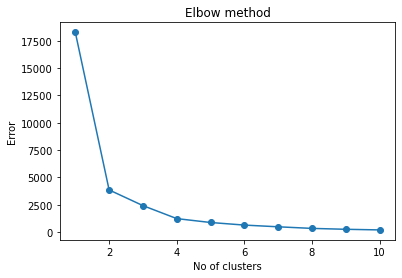

In [144]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(coffee_df[['Potassium','Sodium','Caffeine','Cost']])
    kmeans.fit(coffee_df[['Potassium','Sodium','Caffeine','Cost']])
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error,  marker='o')
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

> As you can see, the optimal value of k is between 2 and 4, as the elbow-like shape is formed at k=3 in the above graph.

In [145]:
# Importing K-means
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(coffee_df[['Potassium','Sodium','Caffeine','Cost']])

KMeans(n_clusters=3)

In [146]:
# Output variable is clusters.labels_
coffee_df['clusterid'] = clusters.labels_

In [147]:
coffee_df.head()

,Name,Potassium,Sodium,Caffeine,Cost,clusterid
0,new_england_coffee,144,15,4.7,0.43,1
1,post_alley_blend,151,19,4.9,0.43,1
2,stumpdown_coffee,157,15,0.9,0.48,1
3,bizzy_organic_coffee,170,7,5.2,0.73,1
4,indian_bean,152,11,5.0,0.77,1


In [229]:
X = coffee_df.iloc[:, [1, 2, 3, 4]].values
cp = clusters.fit_predict(X)

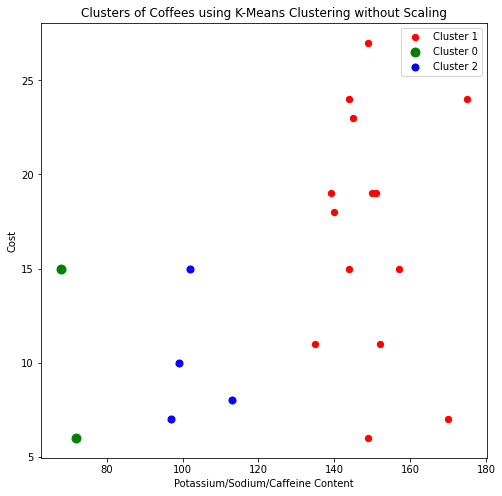

In [230]:
plt.figure(figsize=(8,8))
plt.scatter(X[cp == 0, 0], X[cp == 0, 1], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(X[cp == 1, 0], X[cp == 1, 1], s = 80, c = 'green', label = 'Cluster 0')
plt.scatter(X[cp == 2, 0], X[cp == 2, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Coffees using K-Means Clustering without Scaling')
plt.xlabel('Potassium/Sodium/Caffeine Content')
plt.ylabel('Cost')
plt.legend()
plt.show()

### Scaling

In [149]:
# Scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_coffee_df = scaler.fit_transform(coffee_df[['Potassium','Sodium','Caffeine','Cost']])
scaled_coffee_df[0:5]

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478]])

In [150]:
# Clustering again
clusters_coffee = KMeans(3)
clusters_coffee.fit(scaled_coffee_df)
coffee_df['clusterid_new'] = clusters_coffee.labels_

In [151]:
coffee_df.head()

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_new
0,new_england_coffee,144,15,4.7,0.43,1,1
1,post_alley_blend,151,19,4.9,0.43,1,1
2,stumpdown_coffee,157,15,0.9,0.48,1,2
3,bizzy_organic_coffee,170,7,5.2,0.73,1,0
4,indian_bean,152,11,5.0,0.77,1,0


In [221]:
cp_k = clusters_coffee.fit_predict(scaled_coffee_df)

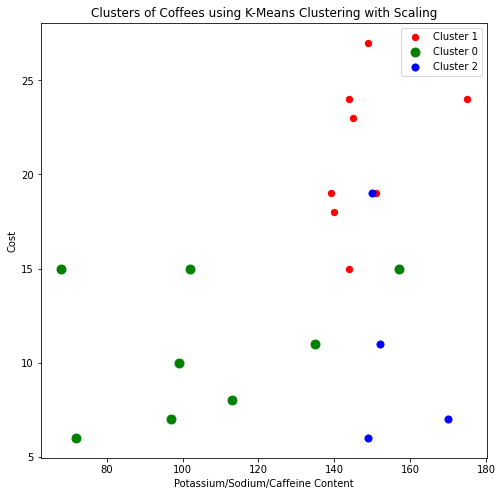

In [227]:
plt.figure(figsize=(8,8))
plt.scatter(X[cp_k == 0, 0], X[cp_k == 0, 1], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(X[cp_k == 1, 0], X[cp_k == 1, 1], s = 80, c = 'green', label = 'Cluster 0')
plt.scatter(X[cp_k == 2, 0], X[cp_k == 2, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Coffees using K-Means Clustering with Scaling')
plt.xlabel('Potassium/Sodium/Caffeine Content')
plt.ylabel('Cost')
plt.legend()
plt.show()

<br>

## _Agglomerative Clustering_
This clustering mechanism finds points of data that are closest to each other, and successively groups them together. 

The main hyperparameter of this mechanism is:
> n_clusters (the number of clusters you want) — data are successively merged, one at a time, until there are n clusters remaining

Agglomerative clustering is hierarchical because it performs operations sequentially. This algorithm is useful in cases where you want to make decisions about how coarsely or finely you want to group your data, or what resolution you want your data in.

For example, you could choose to group residents in a local geographic area by Block, Neighborhood, City, or State, with the resolution increasing from very fine to very coarse

In [232]:
from sklearn.cluster import AgglomerativeClustering
X = coffee_df.iloc[:, [1, 2, 3, 4]].values

In Agglomerative Clustering, the number of optimal clusters is found using the dendrograms  method

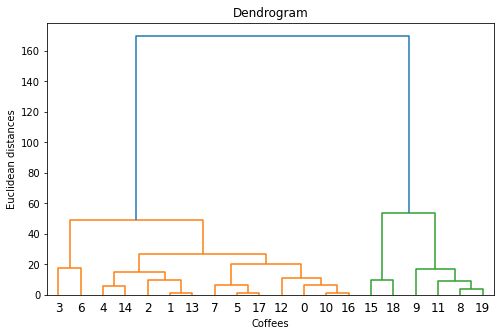

In [235]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8,5))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Coffees')
plt.ylabel('Euclidean distances')
plt.show()

In [156]:
clusters_agg = KMeans(3)
clusters_agg.fit(coffee_df[['Potassium','Sodium','Caffeine','Cost']])

KMeans(n_clusters=3)

In [157]:
# Output variable is clusters.labels_
coffee_df['clusterid_agg'] = clusters_agg.labels_

In [187]:
coffee_df.head()

,Name,Potassium,Sodium,Caffeine,Cost,clusterid,clusterid_new,clusterid_agg
0,new_england_coffee,144,15,4.7,0.43,1,1,2
1,post_alley_blend,151,19,4.9,0.43,1,1,2
2,stumpdown_coffee,157,15,0.9,0.48,1,2,1
3,bizzy_organic_coffee,170,7,5.2,0.73,1,0,0
4,indian_bean,152,11,5.0,0.77,1,0,0


In [204]:
cp_agg = clusters_agg.fit_predict(X)

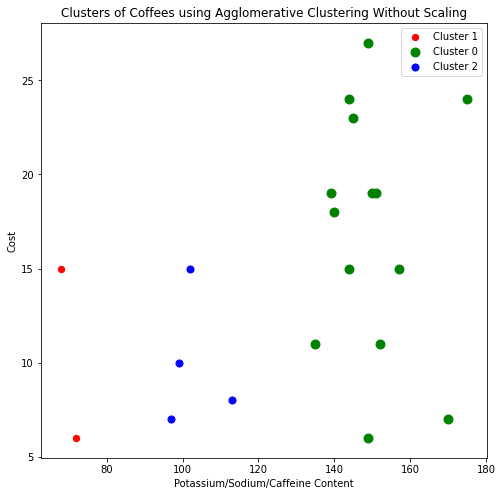

In [223]:
plt.figure(figsize=(8,8))
plt.scatter(X[cp_agg == 0, 0], X[cp_agg == 0, 1], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(X[cp_agg == 1, 0], X[cp_agg == 1, 1], s = 80, c = 'green', label = 'Cluster 0')
plt.scatter(X[cp_agg == 2, 0], X[cp_agg == 2, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Coffees using Agglomerative Clustering Without Scaling')
plt.xlabel('Potassium/Sodium/Caffeine Content')
plt.ylabel('Cost')
plt.legend()
plt.show()

### Scaling 

In [209]:
cp2 = clusters_agg.fit_predict(scaled_coffee_df)

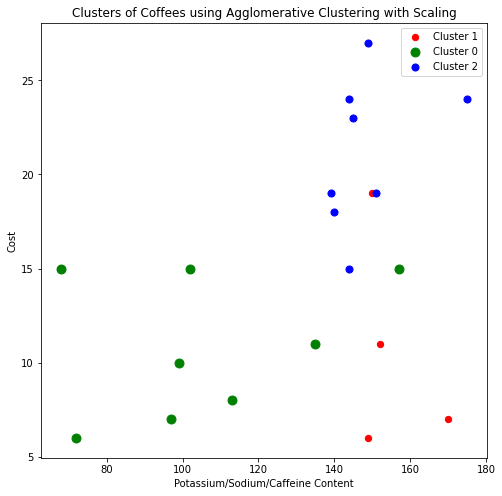

In [224]:
plt.figure(figsize=(8,8))
plt.scatter(X[cp2 == 0, 0], X[cp2 == 0, 1], s = 40, c = 'red', label = 'Cluster 1')
plt.scatter(X[cp2 == 1, 0], X[cp2 == 1, 1], s = 80, c = 'green', label = 'Cluster 0')
plt.scatter(X[cp2 == 2, 0], X[cp2 == 2, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.title('Clusters of Coffees using Agglomerative Clustering with Scaling')
plt.xlabel('Potassium/Sodium/Caffeine Content')
plt.ylabel('Cost')
plt.legend()
plt.show()

<br>

## _Interpretation of Clusters_

### KMeans

In [162]:
coffee_df['clusterid_new'] = clusters_coffee.labels_
coffee_k=pd.DataFrame(coffee_df['clusterid_new'].value_counts()).rename(columns={'clusterid_new':'Number of Coffee types'})
coffee_k.T

,2,1,0
Number of Coffee types,8,8,4


In [163]:
coffee_df.set_index('clusterid_new')
grouped=coffee_df.groupby(by='clusterid_new').mean().round(1)
grouped.iloc[:,[1,2,3,4]]

,Sodium,Caffeine,Cost,clusterid
clusterid_new,,,,
0,10.8,5.0,0.8,1.0
1,21.1,4.8,0.4,1.0
2,10.9,3.3,0.4,0.8


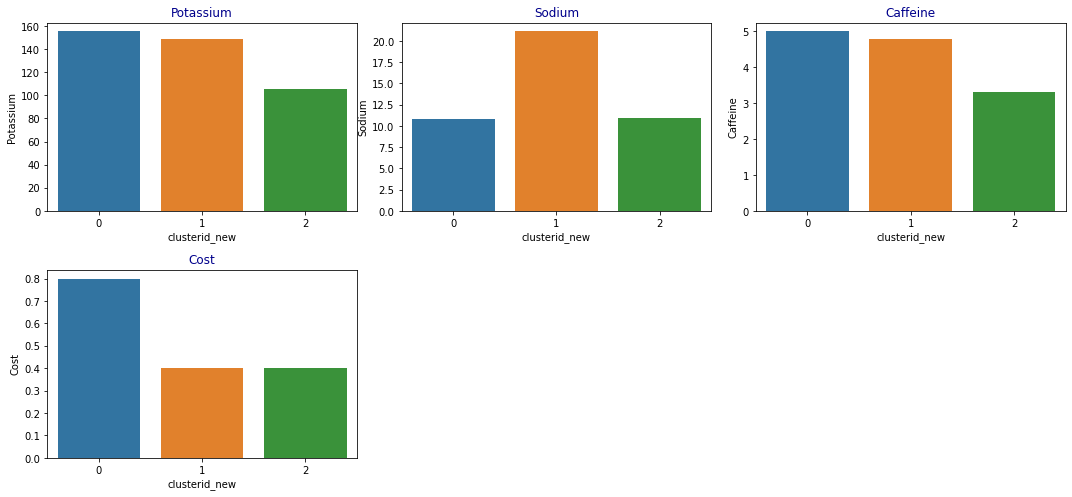

In [164]:
features=['Potassium','Sodium','Caffeine','Cost']
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    sn.barplot(grouped.index,grouped[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

Cluster 0 : Coffee types having very high amount of Potassium and Caffeine content but average Sodium content and High Cost

Cluster 1 : Coffee types having high amount of Potassium, Sodium, Caffeine content but average Cost

Cluster 2 : Coffee types having high average amount of Potassium, Sodium, Caffeine content and average Cost

<br>

### Agglomerative

In [165]:
coffee_df['clusterid_agg'] = clusters_agg.labels_
coffee_agg=pd.DataFrame(coffee_df['clusterid_agg'].value_counts()).rename(columns={'clusterid_agg':'Number of Coffee types'})
coffee_agg.T

,2,1,0
Number of Coffee types,8,8,4


In [166]:
coffee_df.set_index('clusterid_agg')
grouped_agg=coffee_df.groupby(by='clusterid_agg').mean().round(1)
grouped_agg.iloc[:,[1,2,3,4]]

,Sodium,Caffeine,Cost,clusterid
clusterid_agg,,,,
0,10.8,5.0,0.8,1.0
1,10.9,3.3,0.4,0.8
2,21.1,4.8,0.4,1.0


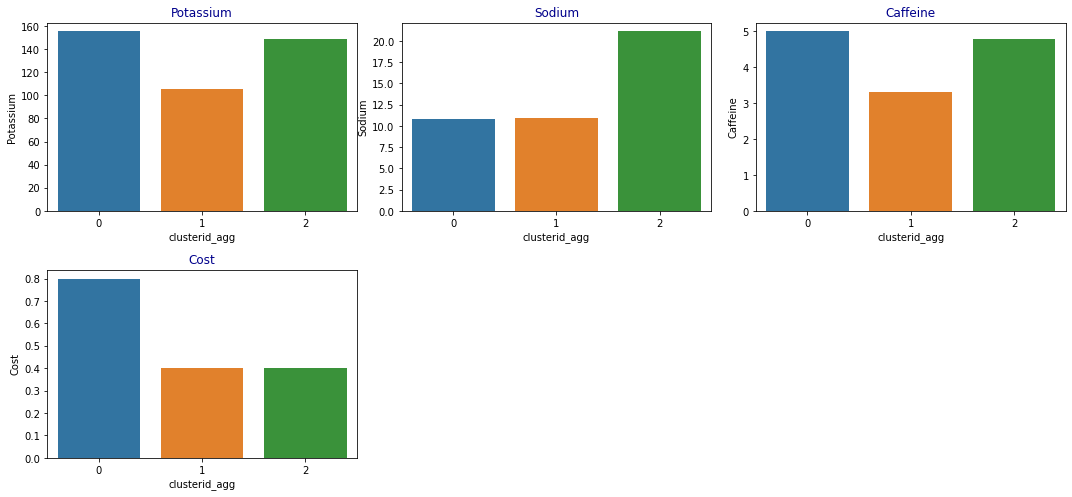

In [167]:
features=['Potassium','Sodium','Caffeine','Cost']
plt.figure(figsize=(15,10))
for i,j in enumerate(features):
    plt.subplot(3,3,i+1)
    sn.barplot(grouped_agg.index,grouped_agg[j])
    plt.title(j,fontdict={'color':'darkblue'})
plt.tight_layout()
plt.show()

Cluster 0 : Coffee types having very high amount of Potassium and Caffeine content but average Sodium content and avg Cost

Cluster 1 : Coffee types having average content of Potassium, Sodium, Caffeine and avgerage Cost

Cluster 2 : Coffee types having high amount of Potassium, Sodium, Caffeine content but average Cost

## _Conclusion_

The results of both the clustering are almost similar to the same dataset. It may be possible that when we have a very large dataset, the shape of clusters may differ a little. 

The differences between the two are-

1. Category of K-Means is Centroid based, while Agglomerative Clustering is type of Hierarchical Clustering	
2. Method to find the optimal number of clusters in Kmeans is The Elbow method while in Agglomerative is Dendrogram